In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
file=pd.read_excel('data.xlsx',sheet_name=1,header=None)
file.describe()

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
count,11214.000000,11214.000000,9649.000000,12341.000000,12563.000000,12550.000000,9746.000000,12511.000000,11166.000000,4703.000000,...,11198.000000,12547.000000,11198.000000,11198.000000,12547.000000,12546.000000,12546.000000,12546.00000,1349.0,1349.0
mean,5.132067,244.402443,31.988384,0.615914,1990.924938,171.479841,869.834524,-0.117672,1.840498,1.616415,...,13.405786,18.271114,55.173592,81.748409,68.481532,18.743002,12.319998,15.53356,0.0,0.0
std,4.234976,389.099702,11.553433,0.574966,4.862250,118.343699,609.240369,1.144388,0.366160,0.486310,...,10.228297,10.613042,18.374220,14.414525,13.043434,12.800592,10.882898,11.62211,0.0,0.0
min,1.000000,1.000000,0.000000,-1.000000,1982.000000,3.000000,0.090278,-3.000000,1.000000,1.000000,...,-27.200000,-24.900000,6.100000,-2.200000,24.975000,-22.700000,-27.300000,-25.00000,0.0,0.0
25%,2.000000,24.000000,24.000000,0.000000,1987.000000,45.000000,15.000000,-1.000000,2.000000,1.000000,...,7.260000,12.100000,43.700000,74.000000,61.000000,9.400000,4.100000,6.75000,0.0,0.0
50%,3.000000,79.000000,31.000000,1.000000,1993.000000,171.000000,1055.000000,0.000000,2.000000,2.000000,...,13.600000,20.700000,57.400000,84.500000,69.500000,21.200000,12.300000,16.35000,0.0,0.0
75%,8.000000,217.000000,40.000000,1.000000,1995.000000,290.000000,1410.750000,0.700000,2.000000,2.000000,...,22.200000,27.150000,67.000000,93.460075,77.500000,30.000000,22.200000,25.40000,0.0,0.0
max,22.000000,2031.000000,99.000000,2.000000,1997.000000,365.000000,1930.000000,3.000000,2.000000,2.000000,...,28.900000,32.350000,100.000000,123.789573,100.350000,37.800000,33.200000,34.50000,0.0,0.0


In [ ]:
#QUESTION 1
indexes=[2,21,18,25,26,36,37,39,41,42,43,73,76,7,48]
for i in indexes:
 print('Info of Column',i+1)
 print('Data Type: ',file[i].dtypes)
 print('No of instances: ',file[i].count())
 print('No of Nulls: ',file[i].isnull().sum())

 q1=file[i].quantile(0.25)
 q3=file[i].quantile(0.75)
 iqr=q3-q1
 outliers = file[i][((file[i]<(q1-1.5*iqr)) | (file[i]>(q3+1.5*iqr)))]
 print('No of Outliers: ',len(outliers))

 print('Min value: ',file[i].min())
 print('Max value: ',file[i].max())
 print('Mode: ',file[i].mode())
 print('Mean: ',file[i].mean())
 print('Median: ',file[i].median())
 print('Variance: ',file[i].var())
 print('Standard Deviation: ',file[i].std())

Info of Column 3
Data Type:  float64
No of instances:  9649
No of Nulls:  2917
No of Outliers:  37
Min value:  0.0
Max value:  99.0
Mode:  0    24.0
Name: 2, dtype: float64
Mean:  31.988383943068364
Median:  31.0
Variance:  133.48181367240846
Standard Deviation:  11.55343298212304
Info of Column 22
Data Type:  float64
No of instances:  12509
No of Nulls:  57
No of Outliers:  356
Min value:  0.15
Max value:  2.13
Mode:  0    0.77
Name: 21, dtype: float64
Mean:  0.7545764248350931
Median:  0.72
Variance:  0.05173000183909021
Standard Deviation:  0.22744230441826388
Info of Column 19
Data Type:  float64
No of instances:  10679
No of Nulls:  1887
No of Outliers:  838
Min value:  0.9385665529010239
Max value:  4.5
Mode:  0    1.2
Name: 18, dtype: float64
Mean:  1.2049583072849963
Median:  1.2
Variance:  0.04908975424594645
Standard Deviation:  0.2215620776350196
Info of Column 26
Data Type:  float64
No of instances:  7665
No of Nulls:  4901
No of Outliers:  1
Min value:  -1.953
Max value:  



Histogram of Column 3


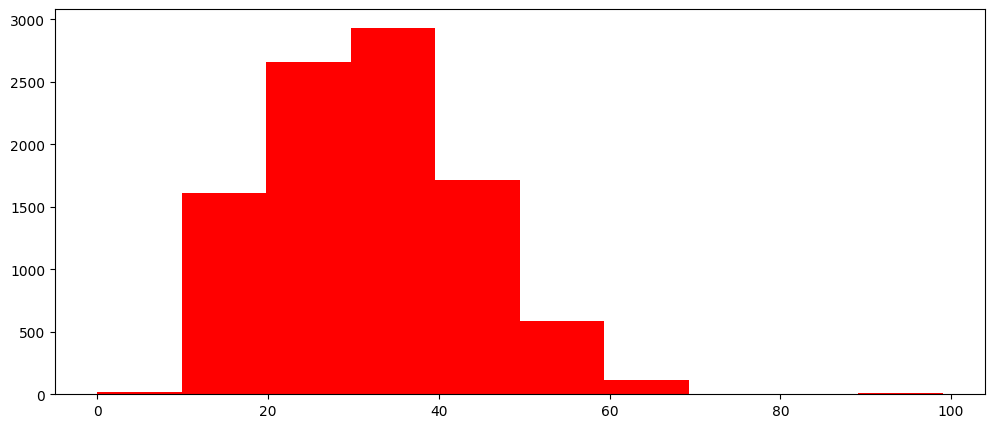



Boxplot of Column 3


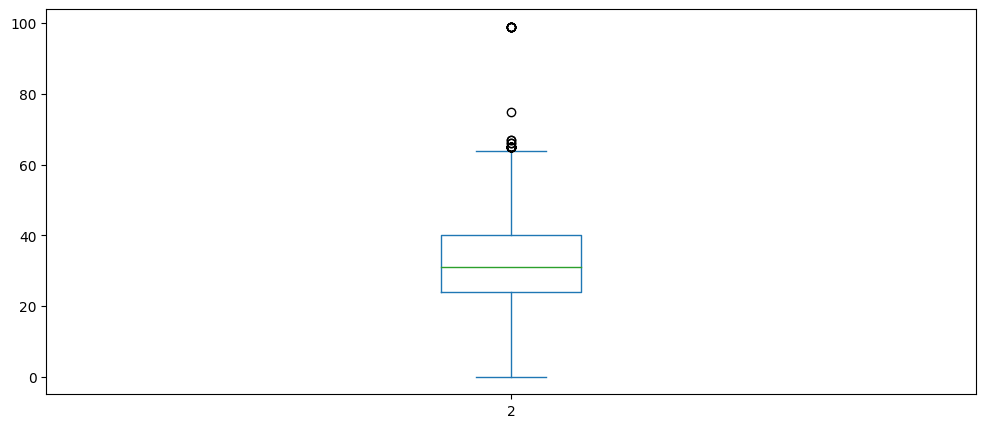



Histogram of Column 22


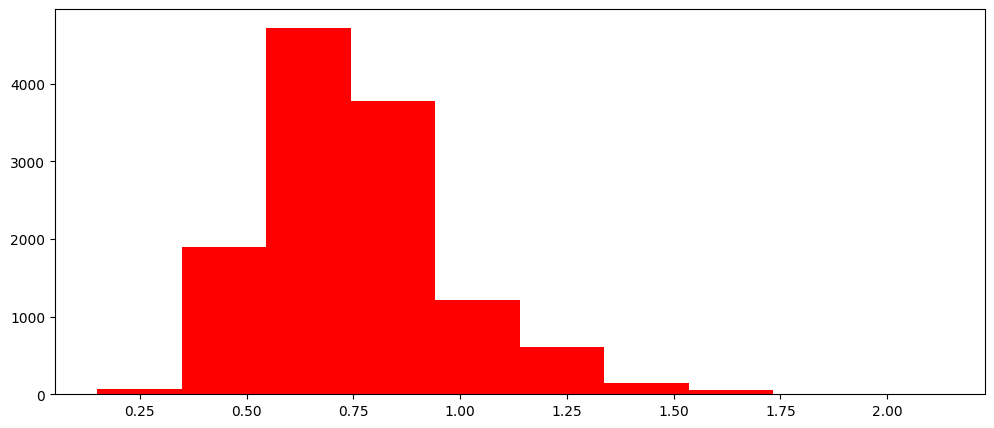



Boxplot of Column 22


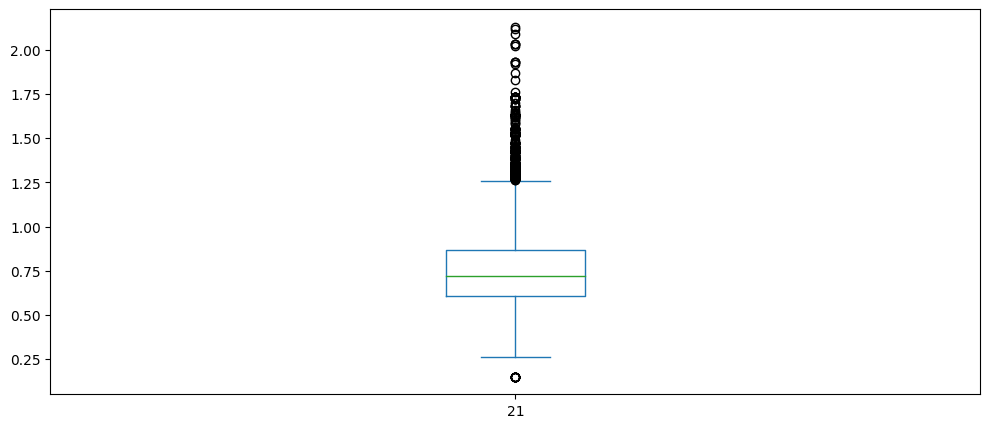



Histogram of Column 19


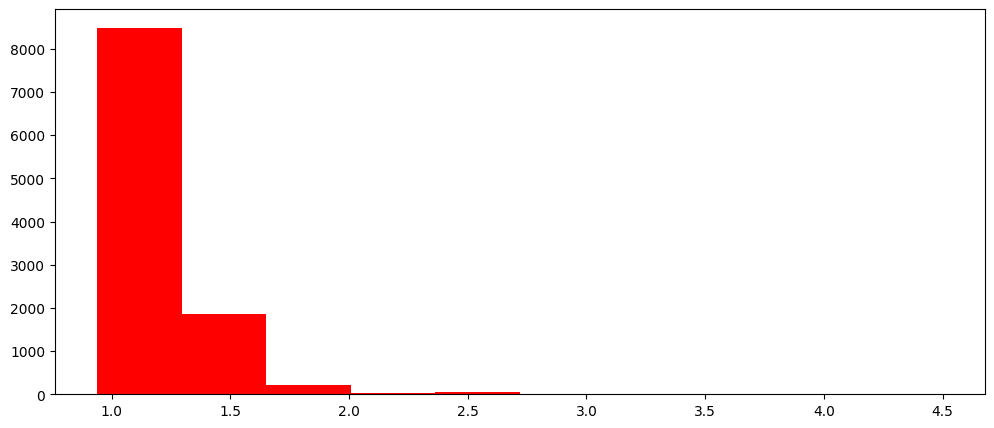



Boxplot of Column 19


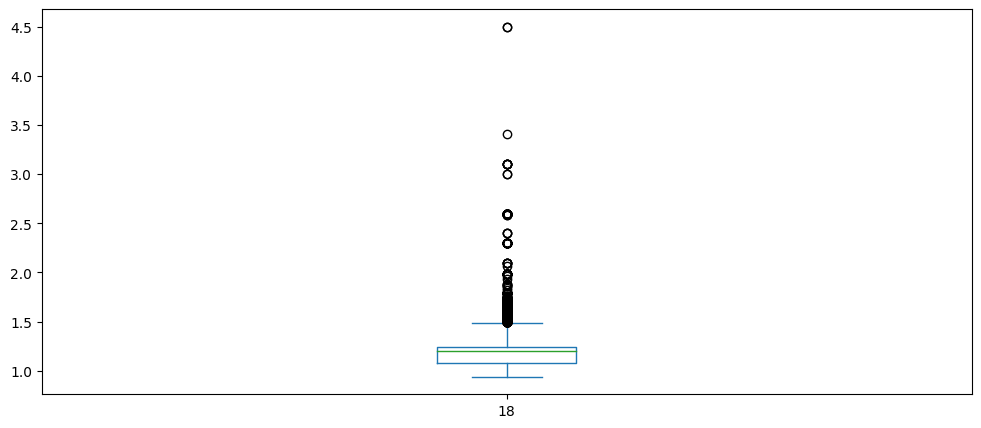



Histogram of Column 26


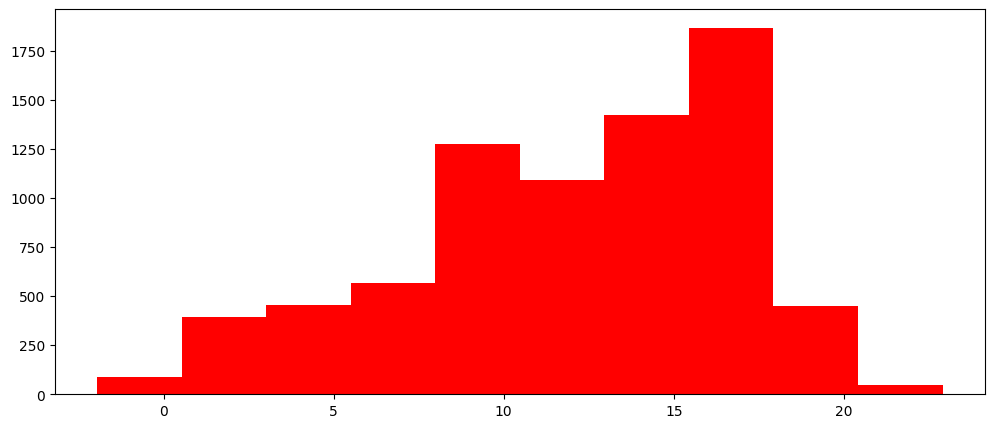



Boxplot of Column 26


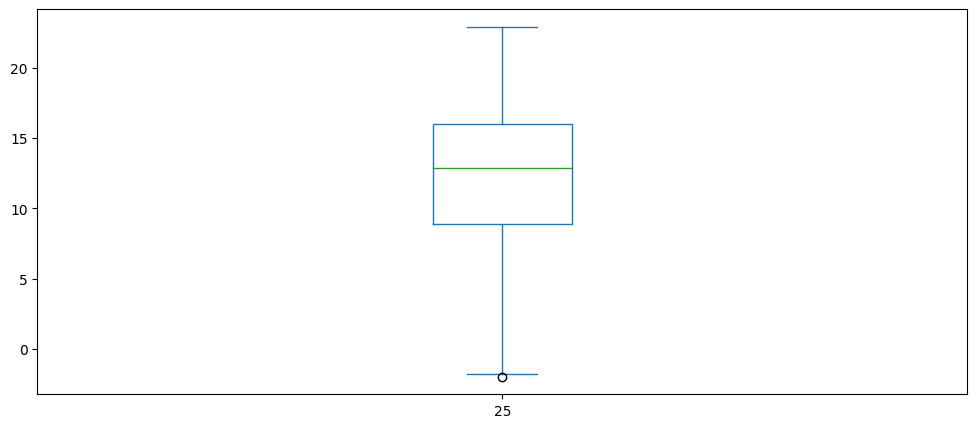



Histogram of Column 27


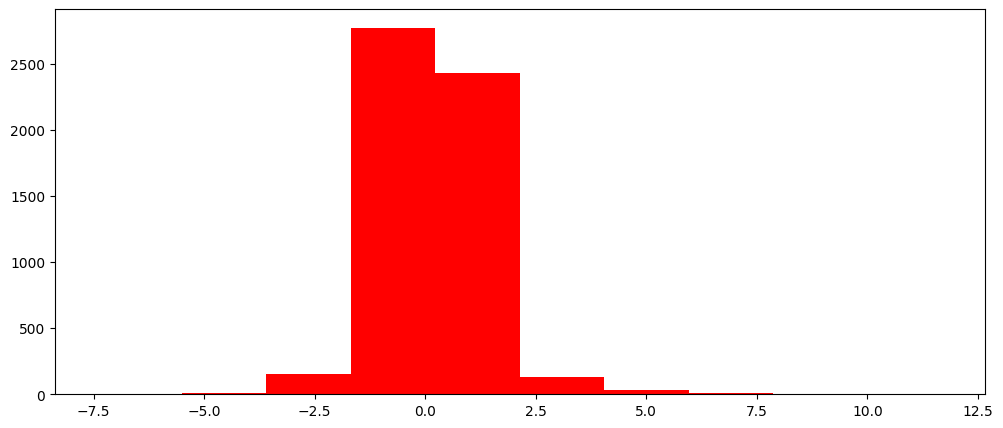



Boxplot of Column 27


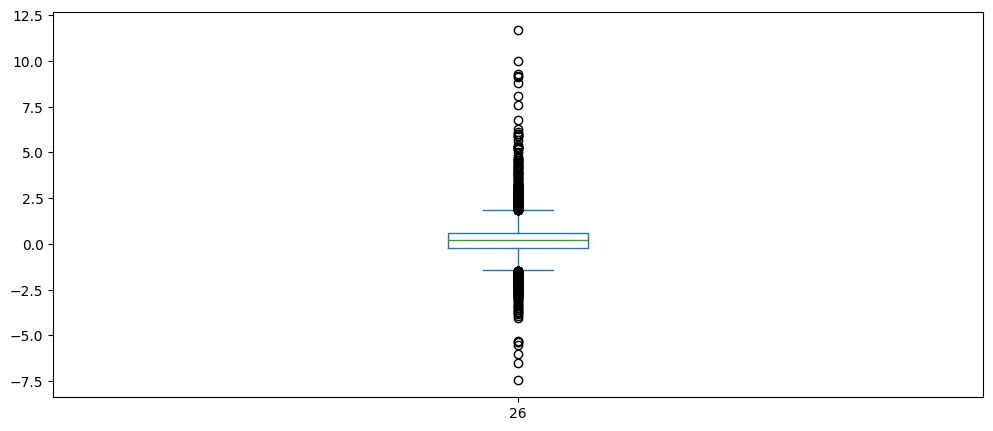



Histogram of Column 37


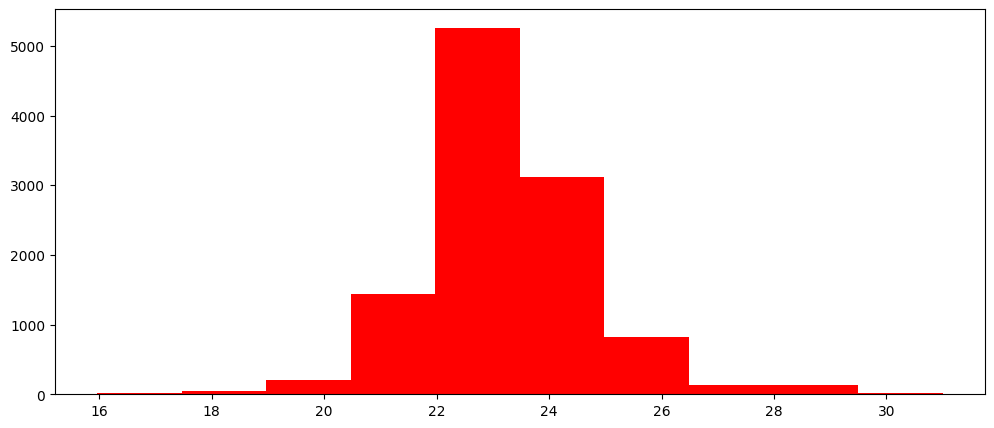



Boxplot of Column 37


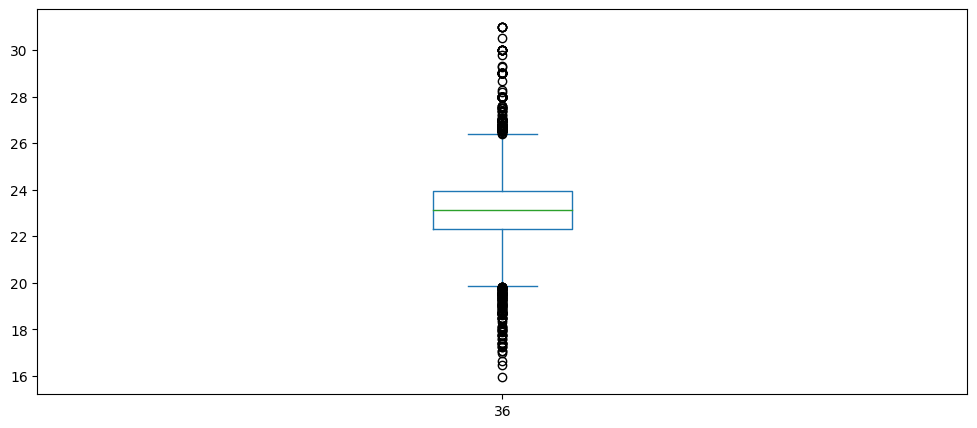



Histogram of Column 38


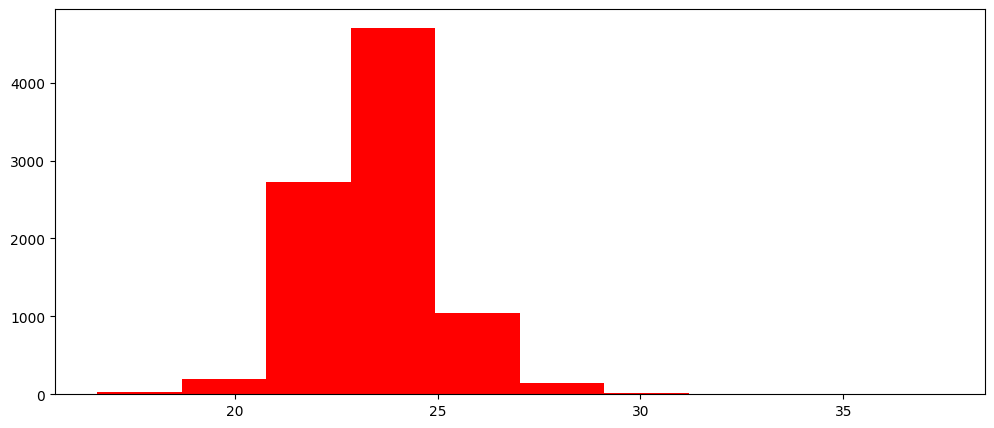



Boxplot of Column 38


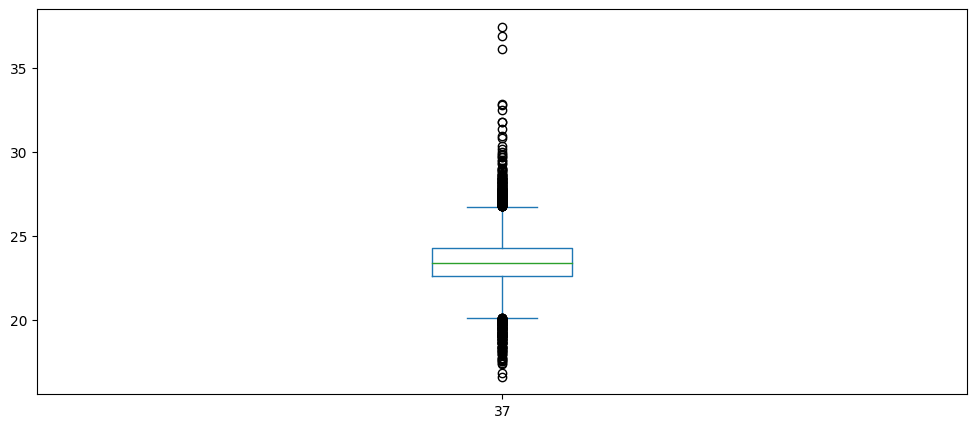



Histogram of Column 40


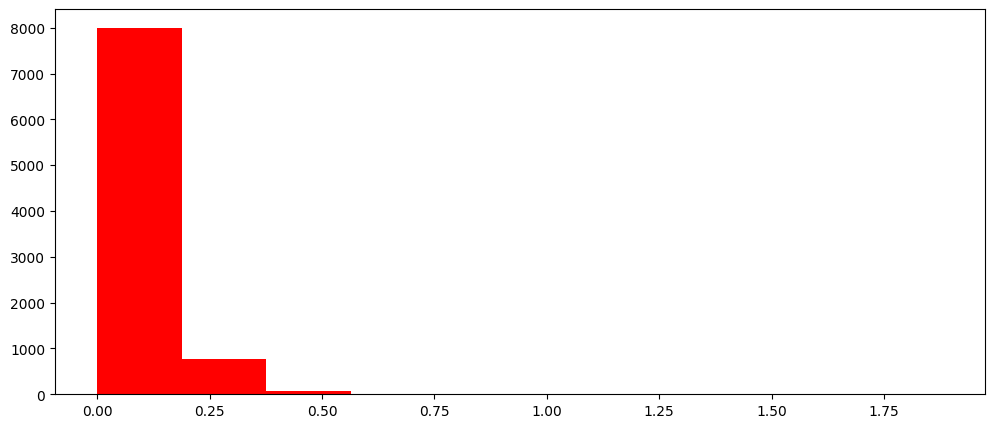



Boxplot of Column 40


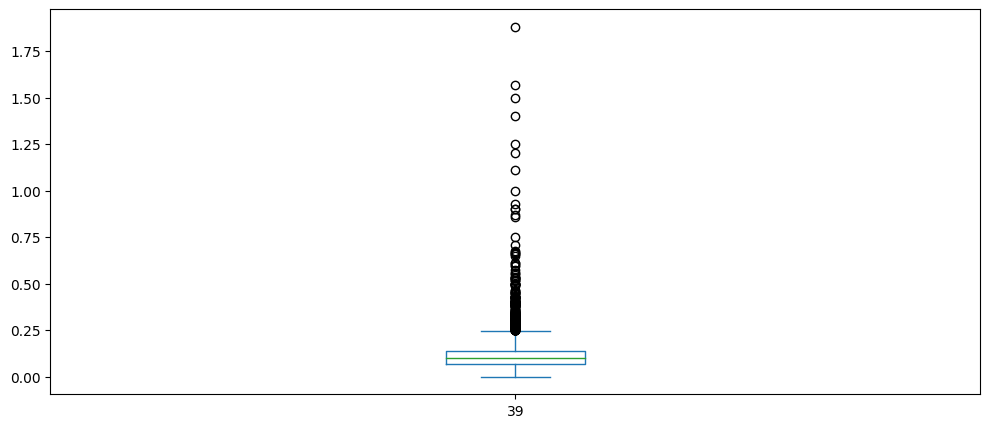



Histogram of Column 42


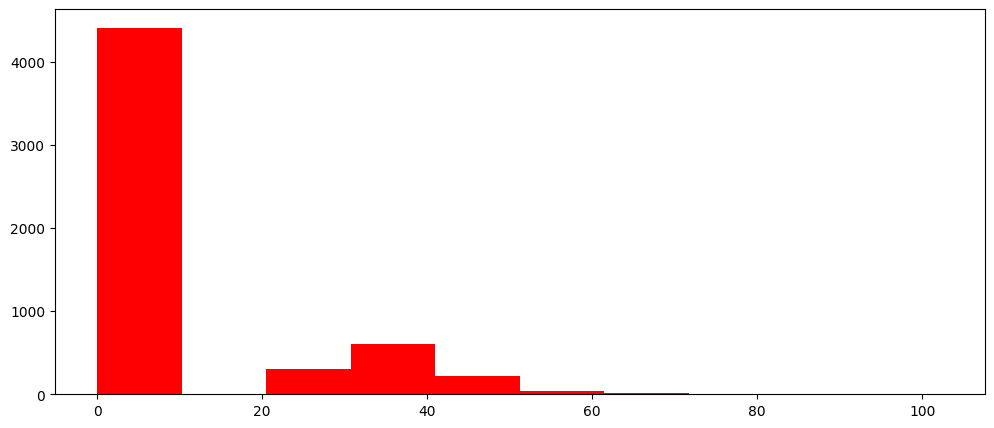



Boxplot of Column 42


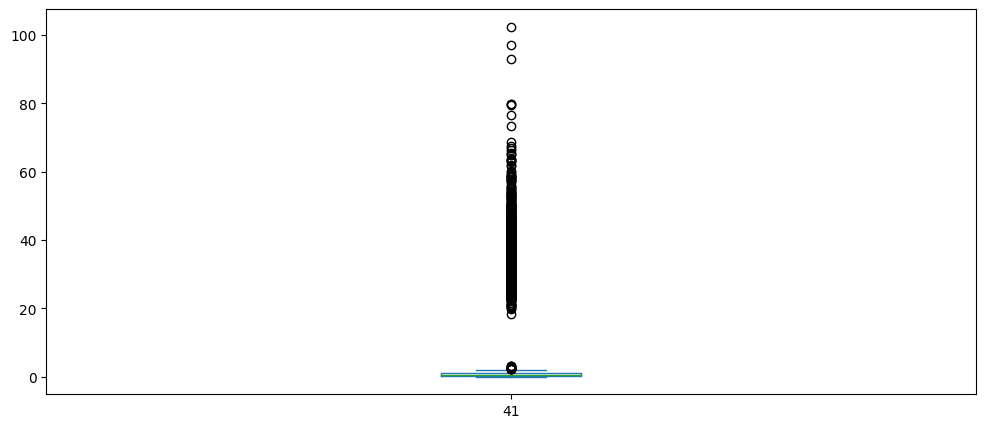



Histogram of Column 43


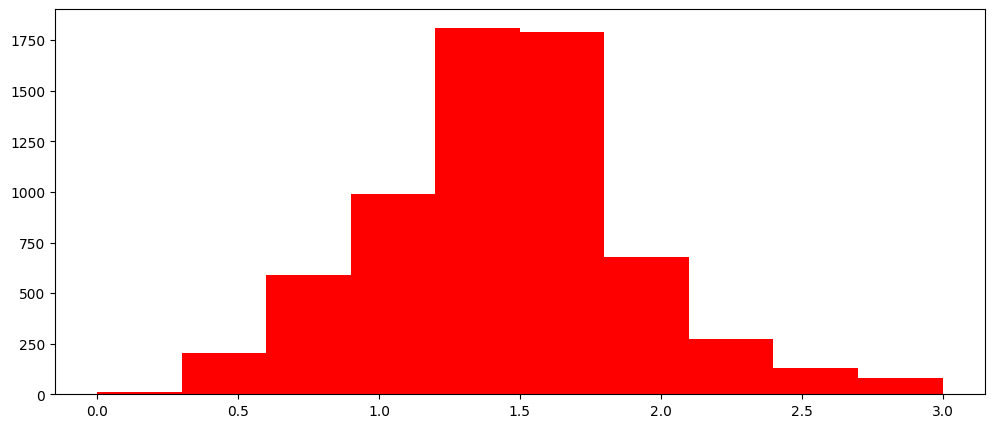



Boxplot of Column 43


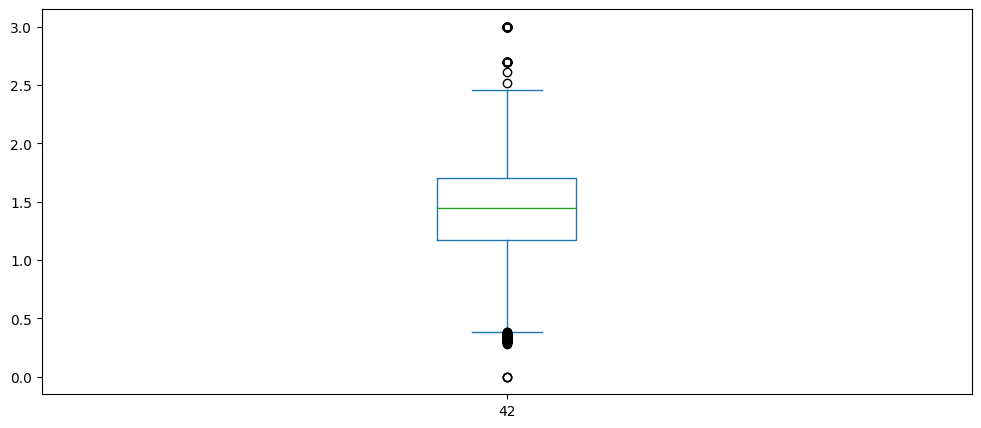



Histogram of Column 44


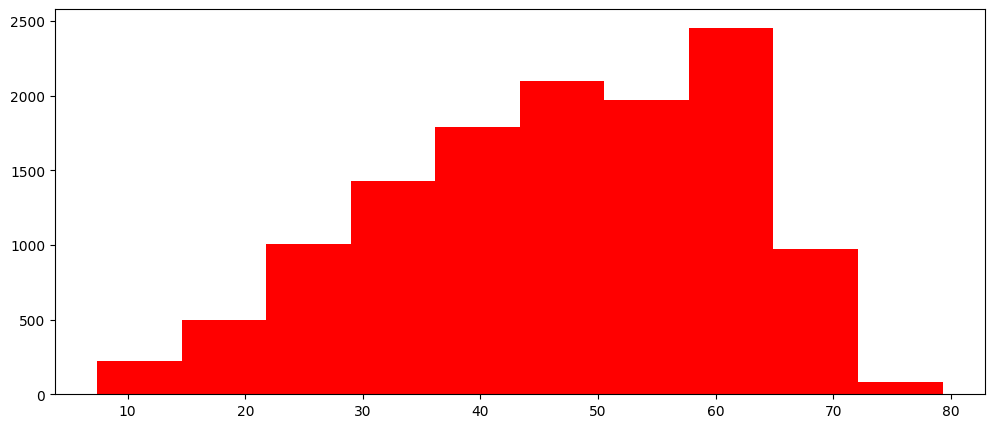



Boxplot of Column 44


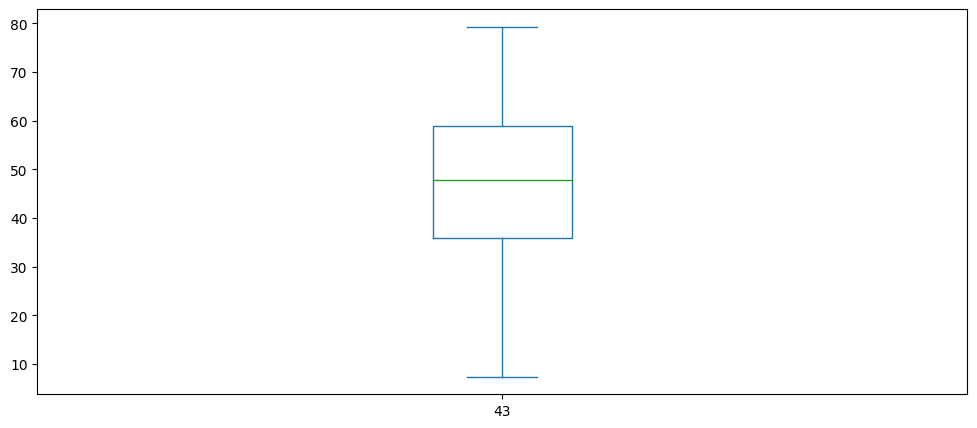



Histogram of Column 74


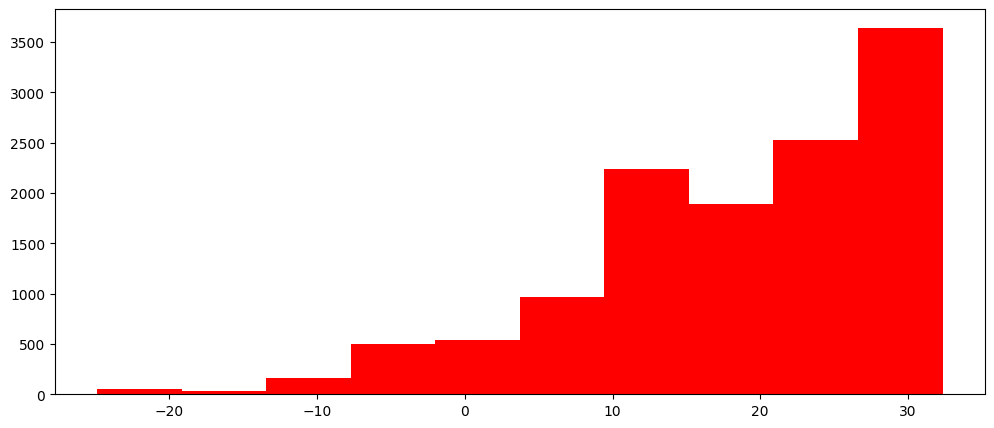



Boxplot of Column 74


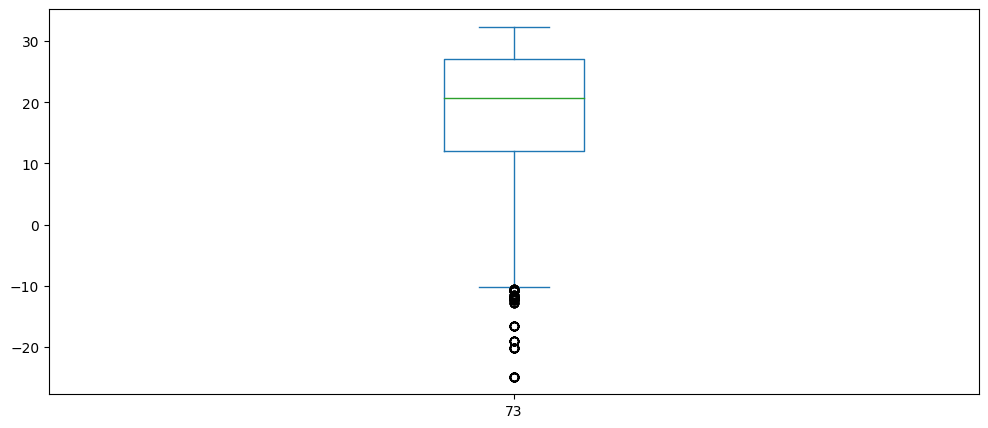



Histogram of Column 77


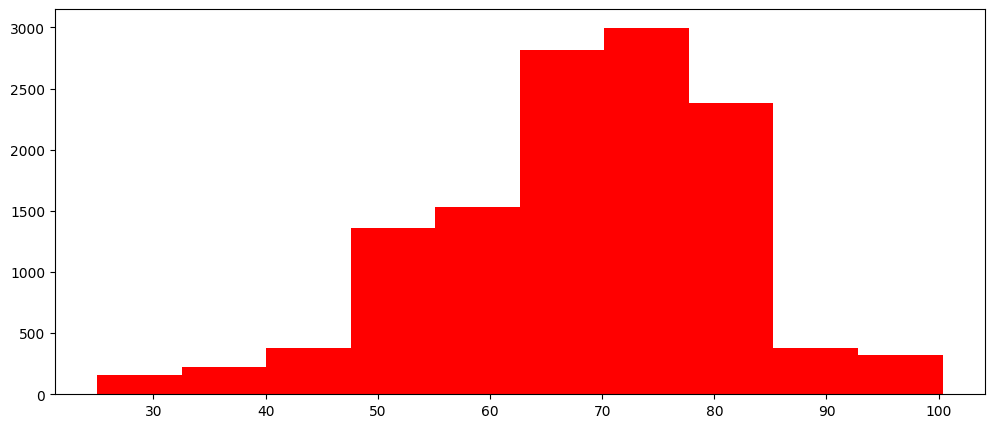



Boxplot of Column 77


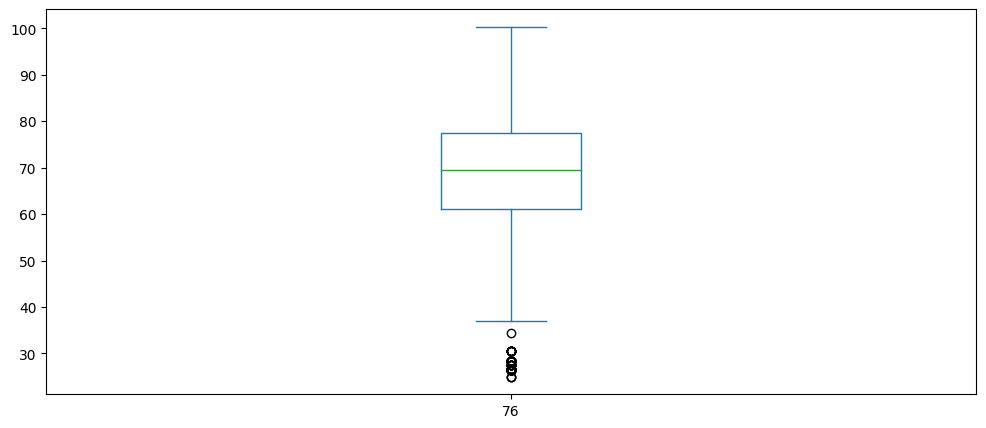



Histogram of Column 8


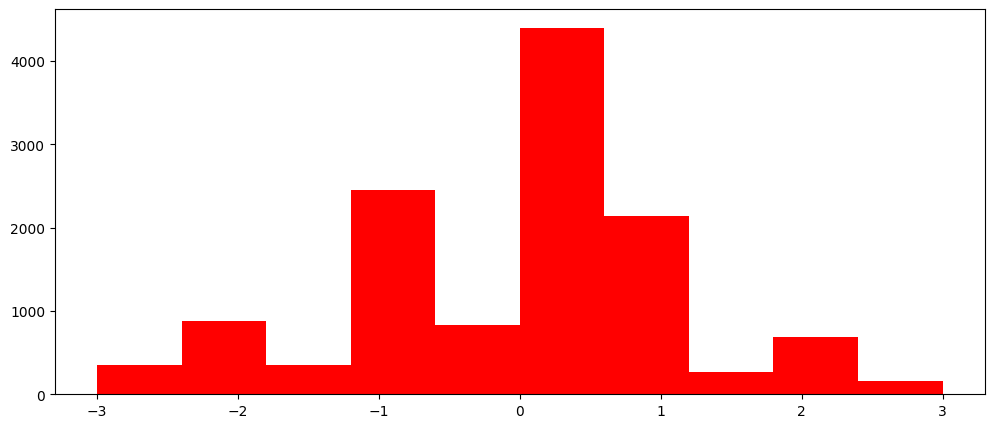



Boxplot of Column 8


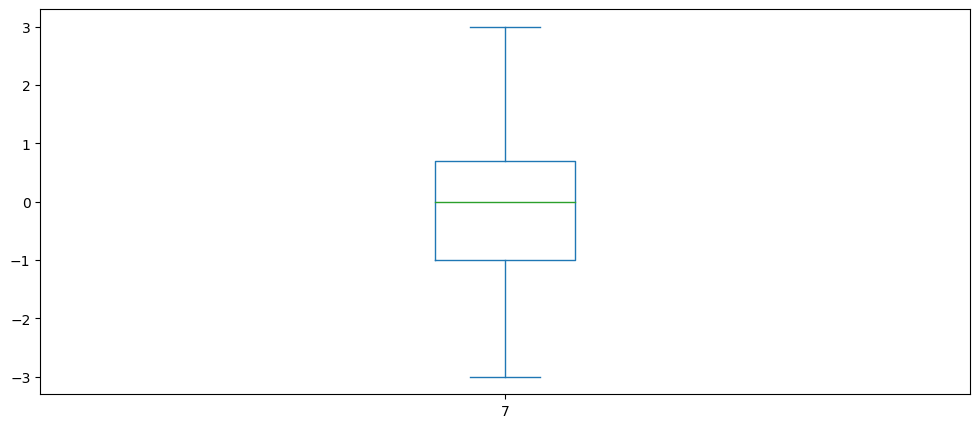



Histogram of Column 49


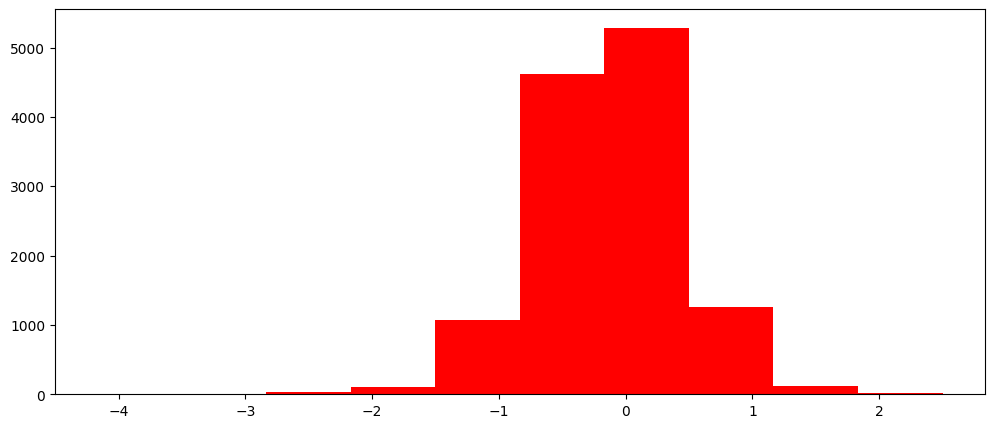



Boxplot of Column 49


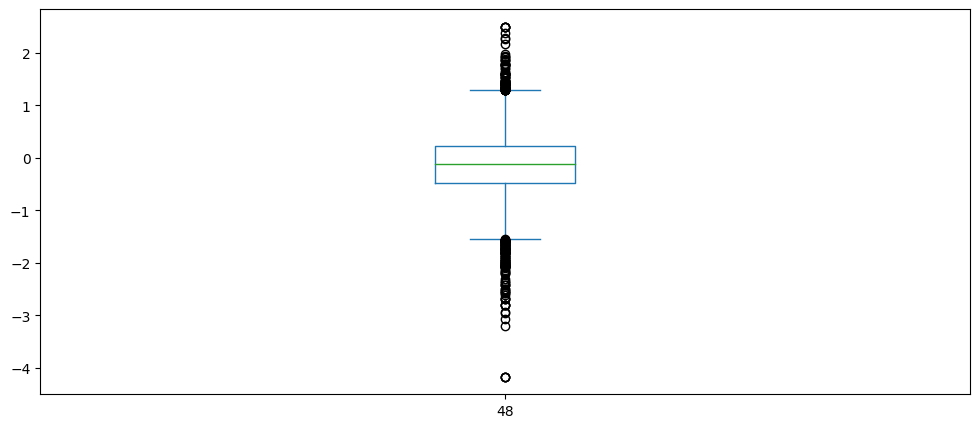

In [ ]:
#QUESTION 2
for i in indexes:
 print('\n\nHistogram of Column',i+1)
 plt.hist(file[i],color="red")
 plt.show()
 print('\n\nBoxplot of Column',i+1)
 file[i].plot(kind='box',)
 plt.show()

In [ ]:
#QUESTION 3
m1=[21,18,26,36,37,39,41,42,]
for i in m1:
 file[i]=file[i].fillna(value=file[i].median())

m2=[2,25,43,73,76,7,48]
for i in m2:
 file[i]=file[i].fillna(value=file[i].mean())


In [ ]:
#QUESTION 4
for i in indexes:
 q1=file[i].quantile(0.25)
 q3=file[i].quantile(0.75)
#print(q1,q3)
 iqr=q3-q1
 lower_limit = q1 - 1.5*iqr
 upper_limit = q3 + 1.5*iqr
#print(lower_limit,upper_limit)
 file[i] = np.where(file[i]>upper_limit,upper_limit,file[i])
 file[i] = np.where(file[i]<lower_limit,lower_limit,file[i])

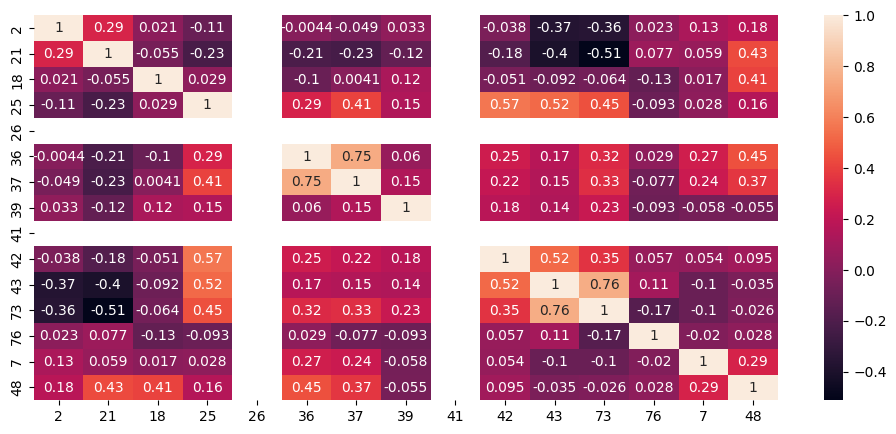

In [ ]:
#QUESTION 6
import matplotlib.pyplot as plt
import seaborn as sns
dataset=file.iloc[:,[2,21,18,25,26,36,37,39,41,42,43,73,76,7,48]]
#dataset=file.iloc[:,['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']]

plt.rcParams["figure.figsize"] = (12, 5)
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [ ]:
#QUESTION 7
indexes=[2,21,18,25,26,36,37,39,41,42,43,73,76,7,48]
for i in indexes:
    prob=file[2].value_counts(normalize=True)
    print(prob)
    entropy=-1*(np.sum(np.log2(prob)*prob))
    print(entropy)

0.520591    0.232134
0.354167    0.074089
0.791667    0.068359
0.583333    0.058412
0.500000    0.053478
              ...   
0.128472    0.000080
0.256944    0.000080
0.137153    0.000080
0.138889    0.000080
0.126736    0.000080
Name: 2, Length: 110, dtype: float64
4.908375408580655
0.520591    0.232134
0.354167    0.074089
0.791667    0.068359
0.583333    0.058412
0.500000    0.053478
              ...   
0.128472    0.000080
0.256944    0.000080
0.137153    0.000080
0.138889    0.000080
0.126736    0.000080
Name: 2, Length: 110, dtype: float64
4.908375408580655
0.520591    0.232134
0.354167    0.074089
0.791667    0.068359
0.583333    0.058412
0.500000    0.053478
              ...   
0.128472    0.000080
0.256944    0.000080
0.137153    0.000080
0.138889    0.000080
0.126736    0.000080
Name: 2, Length: 110, dtype: float64
4.908375408580655
0.520591    0.232134
0.354167    0.074089
0.791667    0.068359
0.583333    0.058412
0.500000    0.053478
              ...   
0.128472    0.00

In [ ]:
probability_arr=[]
entropy_arr=[]
info_arr=[]

indexes=[2,21,18,25,26,36,37,39,41,42,43,73,76,7,48]
for i in indexes:
    prob=file[i].value_counts(normalize=True)
    probability_arr.append(prob)
    entropy=-1*(np.sum(np.log2(prob)*prob))
    entropy_arr.append(entropy)
    print(i,entropy)
    info_gain=(np.sum(np.log2(prob)*prob))
    #print(info_gain)
    #info_arr.append(info_gain)

2 4.908375408580655
21 7.638439976270574
18 3.8288282977858317
25 6.010873977621857
26 -0.0
36 7.277023631091796
37 7.117887659012117
39 4.7231916782416254
41 -0.0
42 2.3931604366294517
43 11.033695402803515
73 8.050129413292769
76 7.427563573940873
7 3.7625256304668873
48 7.678699060331551


In [ ]:
#Applying Algorithms
#QUESTION 1 
def min_max_scaling(column):
    return ((column-column.min())/(column.max()-column.min())*(1-0)+0)

indexes=[2,25,36,43,73,76]
for i in indexes:   
 file[i]=min_max_scaling(file[i])



In [ ]:
#QUESTION 2A
dataset=file.iloc[:,[2,21,18,25,26,36,37,39,41,42,43,73,76,7,48]]
X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[:,0:13],
    dataset.iloc[:,-1],
    test_size=0.20,
    random_state=None)

feature_name=tuple(X_train.columns)
print(feature_name)
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

# Sequential Forward Selection(sfs)
sfs1 = SFS(LinearRegression(),
         k_features='best',
         forward=True,
         floating=False,
         scoring='r2',
         cv = 0)
sfs1=sfs1.fit(X_train,y_train)
sfs1.subsets_

(2, 21, 18, 25, 26, 36, 37, 39, 41, 42, 43, 73, 76)
Training dataset shape: (10052, 13) (10052,)
Testing dataset shape: (2514, 13) (2514,)


{1: {'feature_idx': (5,),
  'cv_scores': array([0.19755022]),
  'avg_score': 0.19755021663585115,
  'feature_names': (36,)},
 2: {'feature_idx': (1, 5),
  'cv_scores': array([0.49110348]),
  'avg_score': 0.4911034790368881,
  'feature_names': (21, 36)},
 3: {'feature_idx': (1, 2, 5),
  'cv_scores': array([0.73947725]),
  'avg_score': 0.7394772488798838,
  'feature_names': (21, 18, 36)},
 4: {'feature_idx': (1, 2, 5, 10),
  'cv_scores': array([0.76430454]),
  'avg_score': 0.7643045435143259,
  'feature_names': (21, 18, 36, 43)},
 5: {'feature_idx': (1, 2, 5, 7, 10),
  'cv_scores': array([0.77441261]),
  'avg_score': 0.7744126073447396,
  'feature_names': (21, 18, 36, 39, 43)},
 6: {'feature_idx': (1, 2, 5, 6, 7, 10),
  'cv_scores': array([0.77812194]),
  'avg_score': 0.7781219395430771,
  'feature_names': (21, 18, 36, 37, 39, 43)},
 7: {'feature_idx': (0, 1, 2, 5, 6, 7, 10),
  'cv_scores': array([0.78161853]),
  'avg_score': 0.7816185279677863,
  'feature_names': (2, 21, 18, 36, 37, 39,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[:,0:13],
    dataset.iloc[:,-1],
    test_size=0.20,
    random_state=None)

feature_name=tuple(X_train.columns)
print(feature_name)
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

# Sequential backward Selection(sfs)
sfs1 = SFS(LinearRegression(),
         k_features='best',
         forward=False,
         floating=False,
         scoring='r2',
         cv = 0)
sfs1=sfs1.fit(X_train,y_train)
sfs1.subsets_

(2, 21, 18, 25, 26, 36, 37, 39, 41, 42, 43, 73, 76)
Training dataset shape: (10052, 13) (10052,)
Testing dataset shape: (2514, 13) (2514,)


{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.78561589]),
  'avg_score': 0.7856158872792322,
  'feature_names': (2, 21, 18, 25, 26, 36, 37, 39, 41, 42, 43, 73, 76)},
 12: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
  'cv_scores': array([0.78561589]),
  'avg_score': 0.7856158872792322,
  'feature_names': (2, 21, 18, 25, 26, 36, 37, 39, 42, 43, 73, 76)},
 11: {'feature_idx': (0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 12),
  'cv_scores': array([0.78561589]),
  'avg_score': 0.7856158872792322,
  'feature_names': (2, 21, 18, 25, 36, 37, 39, 42, 43, 73, 76)},
 10: {'feature_idx': (0, 1, 2, 3, 5, 6, 7, 10, 11, 12),
  'cv_scores': array([0.78561589]),
  'avg_score': 0.7856158863141103,
  'feature_names': (2, 21, 18, 25, 36, 37, 39, 43, 73, 76)},
 9: {'feature_idx': (0, 1, 2, 5, 6, 7, 10, 11, 12),
  'cv_scores': array([0.78539674]),
  'avg_score': 0.785396740859742,
  'feature_names': (2, 21, 18, 36, 37, 39, 43, 73, 76)},
 8: {'feature_idx': (0, 1, 

In [ ]:
#QUESTION 3
#CONVERTING INTO DISCRETE
dataset[7]=pd.cut(dataset[7],bins=[-10,-2.5,-1.5,-0.5,0.5,1.5,2.5,10],labels=[-3,-2,-1,0,1,2,3])
print(dataset[7])

0        2
1        2
2        1
3        3
4        3
        ..
12561   -2
12562   -2
12563   -1
12564    0
12565   -1
Name: 7, Length: 12566, dtype: category
Categories (7, int64): [-3 < -2 < -1 < 0 < 1 < 2 < 3]


C:\Users\pc\AppData\Local\Temp\ipykernel_6708\3470708791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[7]=pd.cut(dataset[7],bins=[-10,-2.5,-1.5,-0.5,0.5,1.5,2.5,10],labels=[-3,-2,-1,0,1,2,3])


In [ ]:
#QUESTION 3A
X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[:,0:13],
    dataset[7],
    test_size=0.20,
    random_state=None)

feature_name=tuple(X_train.columns)
print(feature_name)
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

# Sequential Forward Selection(sfs)
sfs1 = SFS(LGR(),
         k_features='best',
         forward=True,
         floating=False,
         scoring='accuracy',
         cv = 0)
sfs1=sfs1.fit(X_train,y_train)
sfs1.subsets_

(2, 21, 18, 25, 26, 36, 37, 39, 41, 42, 43, 73, 76)
Training dataset shape: (10052, 13) (10052,)
Testing dataset shape: (2514, 13) (2514,)


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

{1: {'feature_idx': (6,),
  'cv_scores': array([0.38440111]),
  'avg_score': 0.38440111420612816,
  'feature_names': (37,)},
 2: {'feature_idx': (6, 11),
  'cv_scores': array([0.38818146]),
  'avg_score': 0.38818145642658175,
  'feature_names': (37, 73)},
 3: {'feature_idx': (0, 6, 11),
  'cv_scores': array([0.396538]),
  'avg_score': 0.3965380023875846,
  'feature_names': (2, 37, 73)},
 4: {'feature_idx': (0, 6, 11, 12),
  'cv_scores': array([0.39504576]),
  'avg_score': 0.3950457620374055,
  'feature_names': (2, 37, 73, 76)},
 5: {'feature_idx': (0, 5, 6, 11, 12),
  'cv_scores': array([0.399423]),
  'avg_score': 0.39942300039793077,
  'feature_names': (2, 36, 37, 73, 76)},
 6: {'feature_idx': (0, 2, 5, 6, 11, 12),
  'cv_scores': array([0.4000199]),
  'avg_score': 0.4000198965380024,
  'feature_names': (2, 18, 36, 37, 73, 76)},
 7: {'feature_idx': (0, 2, 3, 5, 6, 11, 12),
  'cv_scores': array([0.40240748]),
  'avg_score': 0.4024074810982889,
  'feature_names': (2, 18, 25, 36, 37, 73, 

In [ ]:
#QUESTION 3B
X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[:,0:13],
    dataset[7],
    test_size=0.20,
    random_state=None)

feature_name=tuple(X_train.columns)
print(feature_name)
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

sfs1 = SFS(LGR(),
         k_features='best',
         forward=False,
         floating=False,
         scoring='accuracy',
         cv = 0)
sfs1=sfs1.fit(X_train,y_train)
sfs1.subsets_

(2, 21, 18, 25, 26, 36, 37, 39, 41, 42, 43, 73, 76)
Training dataset shape: (10052, 13) (10052,)
Testing dataset shape: (2514, 13) (2514,)


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.4000199]),
  'avg_score': 0.4000198965380024,
  'feature_names': (2, 21, 18, 25, 26, 36, 37, 39, 41, 42, 43, 73, 76)},
 12: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12),
  'cv_scores': array([0.40370076]),
  'avg_score': 0.4037007560684441,
  'feature_names': (2, 21, 18, 25, 26, 36, 37, 41, 42, 43, 73, 76)},
 11: {'feature_idx': (0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12),
  'cv_scores': array([0.40370076]),
  'avg_score': 0.4037007560684441,
  'feature_names': (2, 21, 25, 26, 36, 37, 41, 42, 43, 73, 76)},
 10: {'feature_idx': (0, 1, 3, 4, 5, 8, 9, 10, 11, 12),
  'cv_scores': array([0.40240748]),
  'avg_score': 0.4024074810982889,
  'feature_names': (2, 21, 25, 26, 36, 41, 42, 43, 73, 76)},
 9: {'feature_idx': (0, 1, 4, 5, 8, 9, 10, 11, 12),
  'cv_scores': array([0.40260645]),
  'avg_score': 0.4026064464783128,
  'feature_names': (2, 21, 26, 36, 41, 42, 43, 73, 76)},
 8: {'feature_idx': (0, 1, 

In [ ]:
#QUESTION 4
optimal_pmv_features = dataset.iloc[:,[0,1,2,5,6,7,10]]
X_train, X_test, y_train, y_test = train_test_split(
    optimal_pmv_features.iloc[:,0:-1],
    dataset[48],
    test_size=0.20,
    random_state=None)

sfs1 = SFS(LinearRegression(),
         k_features='best',
         forward=True,
         floating=False,
         scoring='r2',
         cv = 3)
sfs1=sfs1.fit(X_train,y_train)
sfs1.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.20263831, 0.21442726, 0.19778978]),
  'avg_score': 0.2049517847427601,
  'feature_names': (36,)},
 2: {'feature_idx': (1, 3),
  'cv_scores': array([0.49438808, 0.4955087 , 0.4911142 ]),
  'avg_score': 0.49367032879547706,
  'feature_names': (21, 36)},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.74545352, 0.74025144, 0.72679557]),
  'avg_score': 0.7375001741407635,
  'feature_names': (21, 18, 36)},
 4: {'feature_idx': (1, 2, 3, 5),
  'cv_scores': array([0.75058379, 0.74754941, 0.73361997]),
  'avg_score': 0.7439177236228995,
  'feature_names': (21, 18, 36, 39)},
 5: {'feature_idx': (1, 2, 3, 4, 5),
  'cv_scores': array([0.75431831, 0.75130341, 0.73491383]),
  'avg_score': 0.7468451817128896,
  'feature_names': (21, 18, 36, 37, 39)},
 6: {'feature_idx': (0, 1, 2, 3, 4, 5),
  'cv_scores': array([0.75436648, 0.75137767, 0.73494429]),
  'avg_score': 0.7468961496806935,
  'feature_names': (2, 21, 18, 36, 37, 39)}}

In [ ]:
optimal_amv_features = dataset.iloc[:,[0,5,6,7,9,11,12]]
X_train, X_test, y_train, y_test = train_test_split(
    optimal_pmv_features.iloc[:,0:-1],
    dataset[7],
    test_size=0.20,
    random_state=None)

sfs1 = SFS(LGR(),
         k_features='best',
         forward=True,
         floating=False,
         scoring='accuracy',
         cv = 3)
sfs1=sfs1.fit(X_train,y_train)
sfs1.subsets_

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

{1: {'feature_idx': (4,),
  'cv_scores': array([0.38197553, 0.38436288, 0.38119403]),
  'avg_score': 0.3825108120988611,
  'feature_names': (37,)},
 2: {'feature_idx': (4, 5),
  'cv_scores': array([0.38615339, 0.38555655, 0.39164179]),
  'avg_score': 0.3877839094589719,
  'feature_names': (37, 39)},
 3: {'feature_idx': (2, 4, 5),
  'cv_scores': array([0.38615339, 0.39092808, 0.38626866]),
  'avg_score': 0.3877833749782867,
  'feature_names': (18, 37, 39)},
 4: {'feature_idx': (1, 2, 4, 5),
  'cv_scores': array([0.38346762, 0.38734706, 0.38746269]),
  'avg_score': 0.38609245625052896,
  'feature_names': (21, 18, 37, 39)},
 5: {'feature_idx': (0, 1, 2, 4, 5),
  'cv_scores': array([0.38436288, 0.39212175, 0.38029851]),
  'avg_score': 0.3855943796386614,
  'feature_names': (2, 21, 18, 37, 39)},
 6: {'feature_idx': (0, 1, 2, 3, 4, 5),
  'cv_scores': array([0.38824232, 0.39182334, 0.37880597]),
  'avg_score': 0.3862905407311399,
  'feature_names': (2, 21, 18, 36, 37, 39)}}

In [ ]:
arr=dataset.iloc[:,[0,4,5]]
X_train, X_test, y_train, y_test = train_test_split(
    arr,
    dataset[7],
    test_size=0.20,
    random_state=None)

logr=LGR(random_state=None)
logr.fit(X_train,y_train)


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=logr.predict(X_test)

In [ ]:

c_matrix=confusion_matrix(y_test,y_pred)
print(c_matrix)
accuracy=accuracy_score(y_pred,y_test)
print("accuracy ",accuracy)

[[  0   0  16  63   0   0   0]
 [  0   0  16 217   0   0   0]
 [  0   0  28 565   1   0   0]
 [  0   0  32 894  12   0   0]
 [  0   0  11 449  17   0   0]
 [  0   0   3 154   8   0   0]
 [  0   0   1  27   0   0   0]]
accuracy  0.373508353221957
